# Filtro digital aplicado a sinal de áudio

Este notebook aplica um filtro digital para remover um ruído que está contaminando um sinal de áudio.

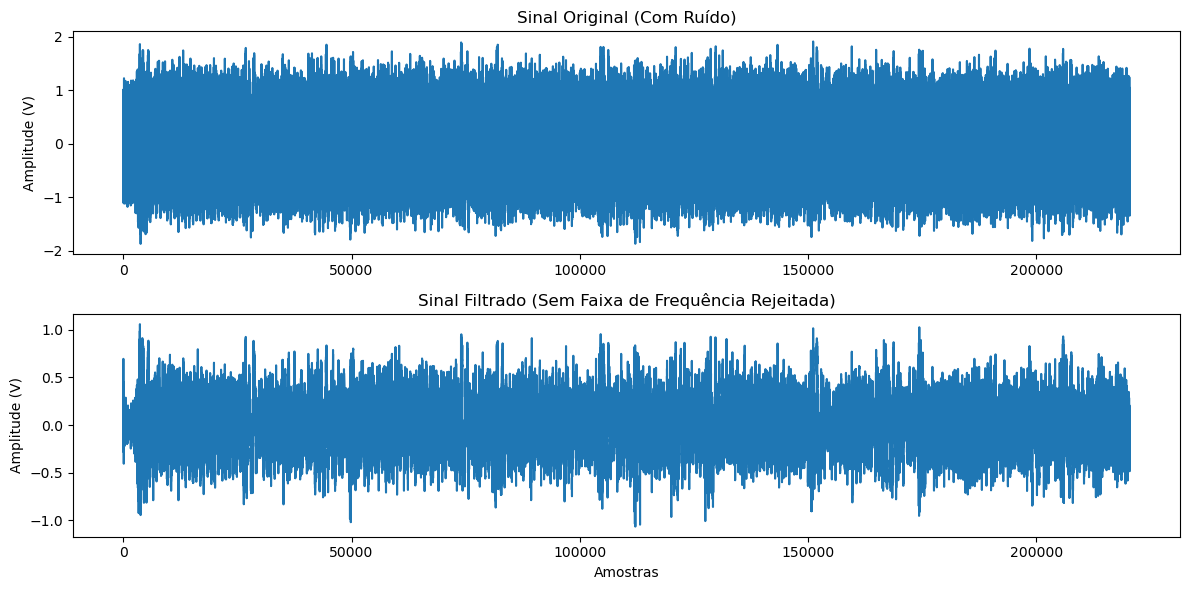

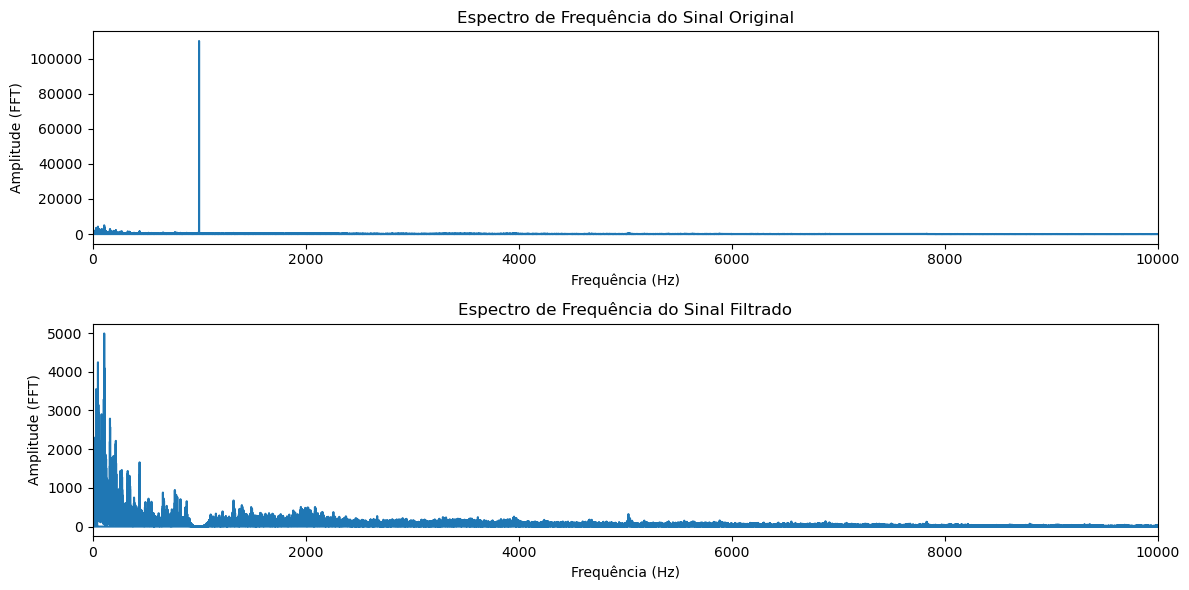

In [2]:
import numpy as np
from scipy import signal
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa

# Carregar o áudio usando Librosa
x, sr = librosa.load("musica_com_ruido.mp3", sr=None, mono=True)

# Normalizando o áudio entre -1 e 1
x = x / x.max()

# Definir a frequência de corte do filtro IIR 
frequencia_corte1 = 900.0
frequencia_corte2 = 1100.0

# Ordem do filtro 
ordem_filtro = 4

# Projeta o filtro IIR rejeita-faixa (bandstop)
b, a = signal.iirfilter(ordem_filtro, [frequencia_corte1, frequencia_corte2], btype='bandstop', fs=sr)

# Aplica o filtro IIR ao sinal de áudio
sinal_filtrado = signal.lfilter(b, a, x)

# Computa a FFT do sinal original (com ruído)
fft_original = np.fft.fft(x)
frequencias_original = np.fft.fftfreq(len(fft_original), 1.0 / sr)

# Computa a FFT do sinal filtrado (sem a faixa de frequência rejeitada)
fft_filtrado = np.fft.fft(sinal_filtrado)
frequencias_filtrado = np.fft.fftfreq(len(fft_filtrado), 1.0 / sr)

# Reproduzir o sinal original (com ruído)
sd.play(x, sr)
sd.wait()

# Reproduzir o sinal filtrado (sem a faixa de frequência rejeitada)
sd.play(sinal_filtrado, sr)
sd.wait()

# Plot - Domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Sinal Original (Com Ruído)')
plt.plot(x)
plt.ylabel('Amplitude (V)')
plt.subplot(2, 1, 2)
plt.title('Sinal Filtrado (Sem Faixa de Frequência Rejeitada)')
plt.plot(sinal_filtrado)
plt.xlabel('Amostras')
plt.ylabel('Amplitude (V)')
plt.tight_layout()
plt.show()

# Plot - Espectros de frequência (FFT)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Espectro de Frequência do Sinal Original')
plt.plot(frequencias_original, np.abs(fft_original))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (FFT)')
plt.xlim(0, 10000)  
plt.subplot(2, 1, 2)
plt.title('Espectro de Frequência do Sinal Filtrado')
plt.plot(frequencias_filtrado, np.abs(fft_filtrado))
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (FFT)')
plt.xlim(0, 10000)  
plt.tight_layout()
plt.show()